In [18]:
import pandas as pd
from sensores import *
from tb import *

In [2]:
fluke = importa_fluke('../../data/fluke_26-07-2021_pruebas.csv')


<AxesSubplot:xlabel='tiempo'>

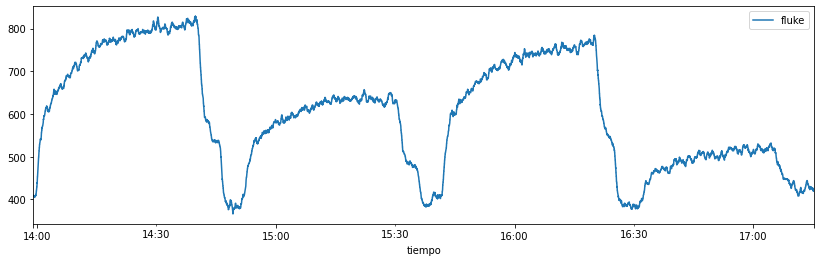

In [3]:
fluke.loc['2021-07-26'].plot(figsize=(14,4))

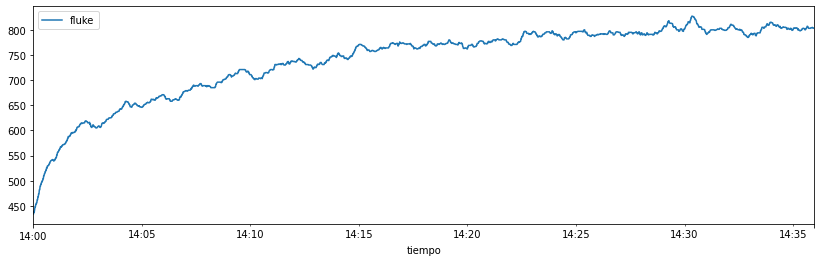

In [4]:
fluke['2021-07-26 14:00':'2021-07-26 14:35'].plot(figsize=(14,4))
f1 = fluke['2021-07-26 14:00':'2021-07-26 14:35']

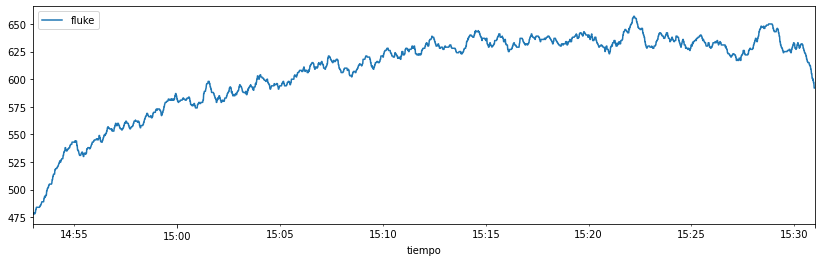

In [5]:
fluke.loc['2021-07-26 14:53':'2021-07-26 15:30'].plot(figsize=(14,4))
f2 = fluke.loc['2021-07-26 14:53':'2021-07-26 15:30']

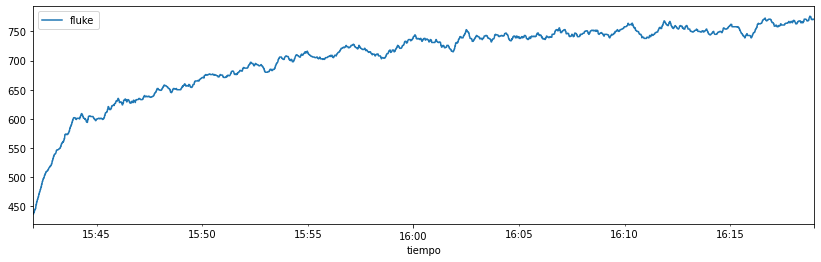

In [6]:
fluke.loc['2021-07-26 15:42':'2021-07-26 16:18'].plot(figsize=(14,4))
f3 = fluke.loc['2021-07-26 15:42':'2021-07-26 16:18']

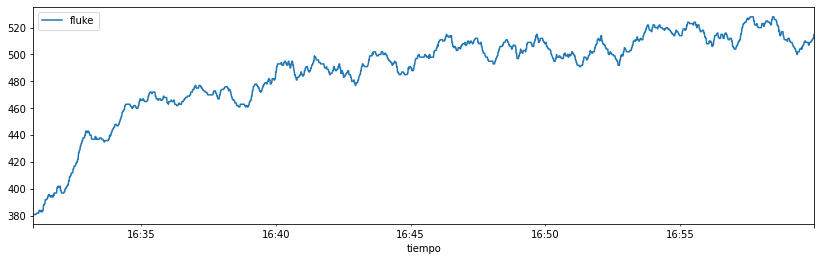

In [7]:
fluke.loc['2021-07-26 16:31':'2021-07-26 16:59'].plot(figsize=(14,4))
f4 = fluke.loc['2021-07-26 16:31':'2021-07-26 16:59']

In [9]:
f1.to_csv('../data/fluke_26-07-2021_800ppm.csv')

In [11]:
f2.to_csv('../data/fluke_26-07-2021_625ppm.csv')

In [13]:
f3.to_csv('../data/fluke_26-07-2021_750ppm.csv')

In [15]:
f4.to_csv('../data/fluke_26-07-2021_520ppm.csv')

In [20]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","eco2","etvoc","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mh-z14a","notice","s8lp","scd30","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [27]:
sensores = ["s8lp","sen0220","t3022","scd30",'cjmcu811']

datos = pd.concat([tb.get_df(key=sensor,start_datetime=('2021-07-24')) for sensor in sensores],axis=1)
datos.index = datos.index + pd.Timedelta("-5H")
datos.tail()


,s8lp,sen0220,t3022,scd30,cjmcu811
ts,,,,,
2021-07-27 05:39:58.506,475.0,NaN,NaN,NaN,NaN
2021-07-27 05:40:02.173,NaN,NaN,484.0,NaN,NaN
2021-07-27 05:40:03.060,NaN,NaN,NaN,404.0,NaN
2021-07-27 05:40:03.496,475.0,NaN,NaN,NaN,NaN
2021-07-27 05:40:03.717,NaN,NaN,NaN,NaN,1805.0


/Users/gbv/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


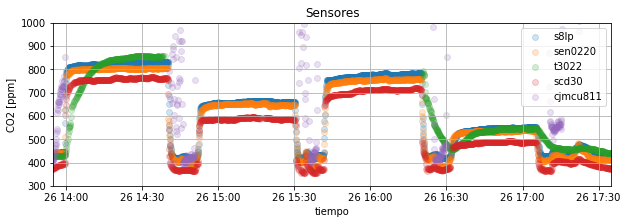

In [33]:
fig, ax = plt.subplots(figsize=(10,3))

fecha1 = parse("2021-07-26 13:55") 
fecha2 = fecha1 + pd.Timedelta("220Min")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()


In [39]:
datos= datos[fecha1:fecha2]
# datos.plot()

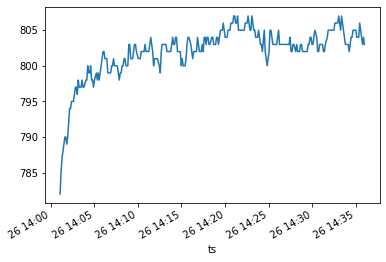

In [51]:
sensores800ppm = datos['2021-07-26 14:01':'2021-07-26 14:35']
sensores800ppm.sen0220.dropna().plot()
sensores800ppm.to_csv("../data/sensores_26-07-2021_800ppm.csv")

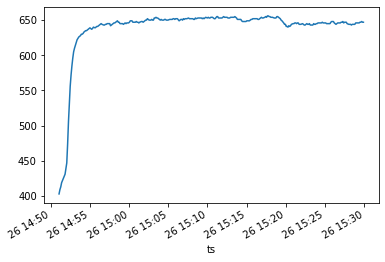

In [58]:
sensores625ppm = datos['2021-07-26 14:51':'2021-07-26 15:29']
sensores625ppm.sen0220.dropna().plot()
sensores625ppm.to_csv("../data/sensores_26-07-2021_625ppm.csv")

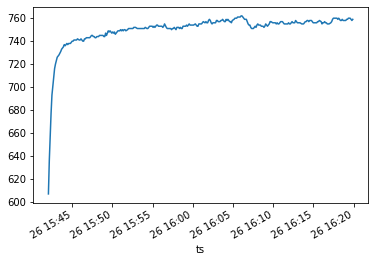

In [64]:
sensores750ppm = datos['2021-07-26 15:42':'2021-07-26 16:19']
sensores750ppm.sen0220.dropna().plot()
sensores750ppm.to_csv("../data/sensores_26-07-2021_750ppm.csv")

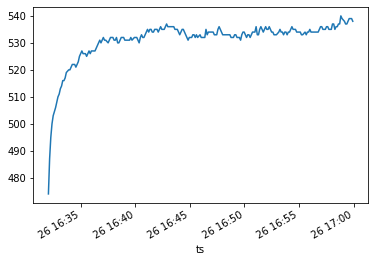

In [66]:
sensores520ppm = datos['2021-07-26 16:32':'2021-07-26 16:59']
sensores520ppm.sen0220.dropna().plot()
sensores520ppm.to_csv("../data/sensores_26-07-2021_520ppm.csv")